# Problem Statement:

Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

Your task is to make a mode that can consider the data provided and predict the Average Price.

# Loading libraries

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [304]:
df=pd.read_csv('C:/Users/vishu/OneDrive/Desktop/avocado.csv')
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [305]:
#The Column "Unnamed:0" is just a representation of the indexes, so it's useless to keep it,So,removing it.
df=df.drop(columns=['Unnamed: 0'])
df

Date  AveragePrice  Total Volume     4046       4225    4770  \
0      2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1      2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2      2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3      2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4      2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244  2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245  2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246  2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247  2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248  2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region  
0                Albany  
1                Albany  
2                Albany  
3                Albany  
4                Albany  
...                 ...  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico  

[18249 rows x 13 columns]

In [306]:
df.shape

(18249, 13)

observations : we have 18249 rows and 13 columns

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


There are no null values in the dataset and majority are of float type

In [308]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [309]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Majority of the columns are of float datatype.Only date,type and region are of object type.

# Check for missing values

In [310]:
#Checking the null values
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

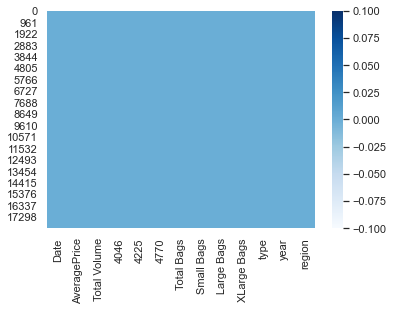

In [311]:
# Visualizing the null values using heatmap
sns.heatmap(df.isnull(),cmap = 'Blues')

There are 0 null values in the dataset as shown above

In [312]:
#all the categorical data types and their unique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ': ' +str(df[column].unique()))
        print(df[column].value_counts())
        print('\n')

Date: ['2015-12-27' '2015-12-20' '2015-12-13' '2015-12-06' '2015-11-29'
 '2015-11-22' '2015-11-15' '2015-11-08' '2015-11-01' '2015-10-25'
 '2015-10-18' '2015-10-11' '2015-10-04' '2015-09-27' '2015-09-20'
 '2015-09-13' '2015-09-06' '2015-08-30' '2015-08-23' '2015-08-16'
 '2015-08-09' '2015-08-02' '2015-07-26' '2015-07-19' '2015-07-12'
 '2015-07-05' '2015-06-28' '2015-06-21' '2015-06-14' '2015-06-07'
 '2015-05-31' '2015-05-24' '2015-05-17' '2015-05-10' '2015-05-03'
 '2015-04-26' '2015-04-19' '2015-04-12' '2015-04-05' '2015-03-29'
 '2015-03-22' '2015-03-15' '2015-03-08' '2015-03-01' '2015-02-22'
 '2015-02-15' '2015-02-08' '2015-02-01' '2015-01-25' '2015-01-18'
 '2015-01-11' '2015-01-04' '2016-12-25' '2016-12-18' '2016-12-11'
 '2016-12-04' '2016-11-27' '2016-11-20' '2016-11-13' '2016-11-06'
 '2016-10-30' '2016-10-23' '2016-10-16' '2016-10-09' '2016-10-02'
 '2016-09-25' '2016-09-18' '2016-09-11' '2016-09-04' '2016-08-28'
 '2016-08-21' '2016-08-14' '2016-08-07' '2016-07-31' '2016-07-24'
 '20

# EDA

# Summary Statistics

In [313]:
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899  
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000  
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000  
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000  
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000  
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000

Observation:

==> 'Average price' has the least mean and 'XLarge Bags' with highest mean.

==> 'XLarge Bags' has the least bags,25 and 75 percentiles are also low.

==> The std is also high in XLarge Bags , so skewness is there and need to remove.

==> The difference between 75 percentile and max is more in XLarge Bags .So,outliers may present.

In [314]:
#Checking for unique values
df['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

In [315]:
df['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.05      1
3.03      1
2.91      1
0.48      1
2.96      1
Name: AveragePrice, Length: 259, dtype: int64

# To check the correlation

In [316]:
dfcor=df.corr()
dfcor

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
4046             -0.208317      0.977863  1.000000  0.926110  0.833389   
4225             -0.172928      0.974181  0.926110  1.000000  0.887855   
4770             -0.179446      0.872202  0.833389  0.887855  1.000000   
Total Bags       -0.177088      0.963047  0.920057  0.905787  0.792314   
Small Bags       -0.174730      0.967238  0.925280  0.916031  0.802733   
Large Bags       -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge Bags      -0.117592      0.747157  0.699377  0.688809  0.679861   
year              0.093197      0.017193  0.003353 -0.009559 -0.036531   

              Total Bags  Small Bags  Large Bags  XLarge Bags      year  
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592  0.093197  
Total Volume    0.963047    0.967238    0.880640     0.747157  0.017193  
4046            0.920057    0.925280    0.838645     0.699377  0.003353  
4225            0.905787    0.916031    0.810015     0.688809 -0.009559  
4770            0.792314    0.802733    0.698471     0.679861 -0.036531  
Total Bags      1.000000    0.994335    0.943009     0.804233  0.071552  
Small Bags      0.994335    1.000000    0.902589     0.806845  0.063915  
Large Bags      0.943009    0.902589    1.000000     0.710858  0.087891  
XLarge Bags     0.804233    0.806845    0.710858     1.000000  0.081033  
year            0.071552    0.063915    0.087891     0.081033  1.000000

<AxesSubplot:>

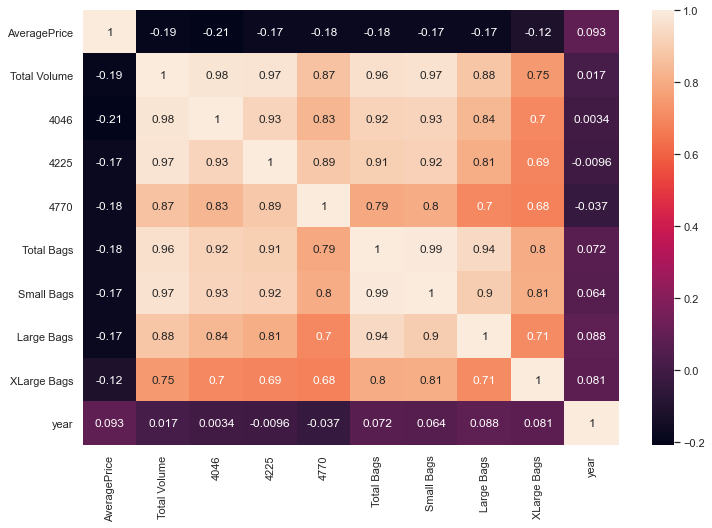

In [317]:
#visualizing correlation using heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot = True)

From the heatmap,

==>Majority of the columns have positive correlation.

==>4046,4225,4770,Total Bags,Small Bags,Large Bags have high correlation with Total Volume.

==>Almost all the columns have negative correlation with Average price but in the range between -1 to +1

==>4046 has least correlation with AveragePrice.

==>The Year column has very good correlation with Average Price

# Data Visualization

# Univariate Analysis

<AxesSubplot:xlabel='year', ylabel='count'>

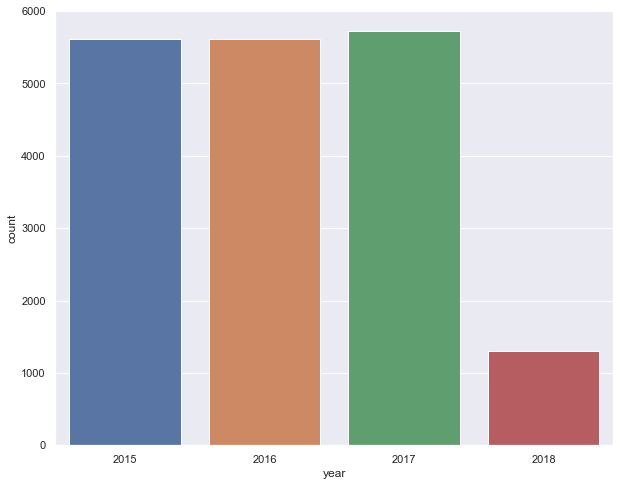

In [318]:
plt.figure(figsize=[10,8])
sns.countplot(x = 'year', data = df)

From the above count plot,year 2017 has highest number of sales whereas  year 2018 has the least .

<AxesSubplot:xlabel='AveragePrice', ylabel='count'>

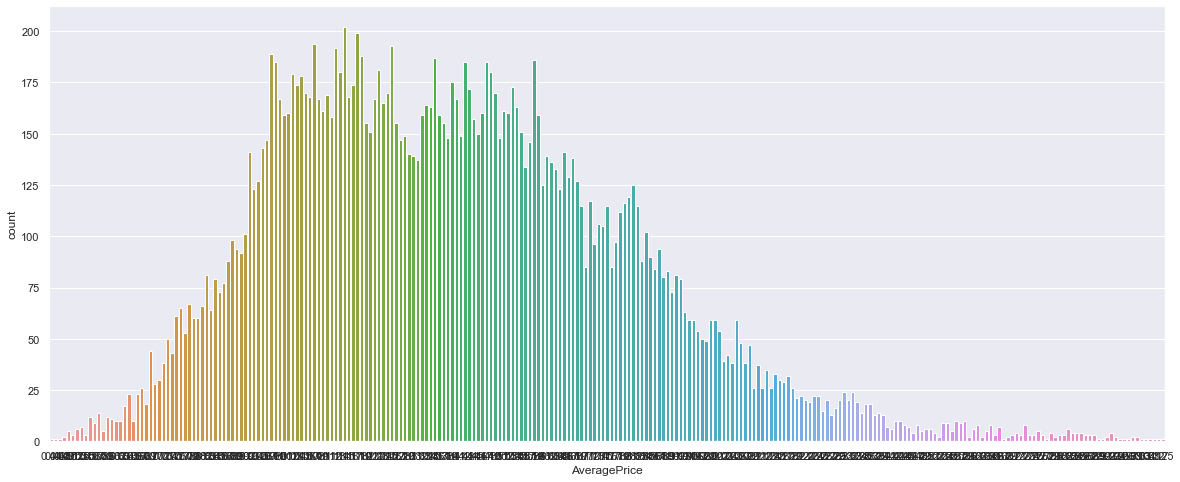

In [319]:
plt.figure(figsize=(20,8))
sns.countplot(df.AveragePrice)

Maximum price occurs at nearly 200

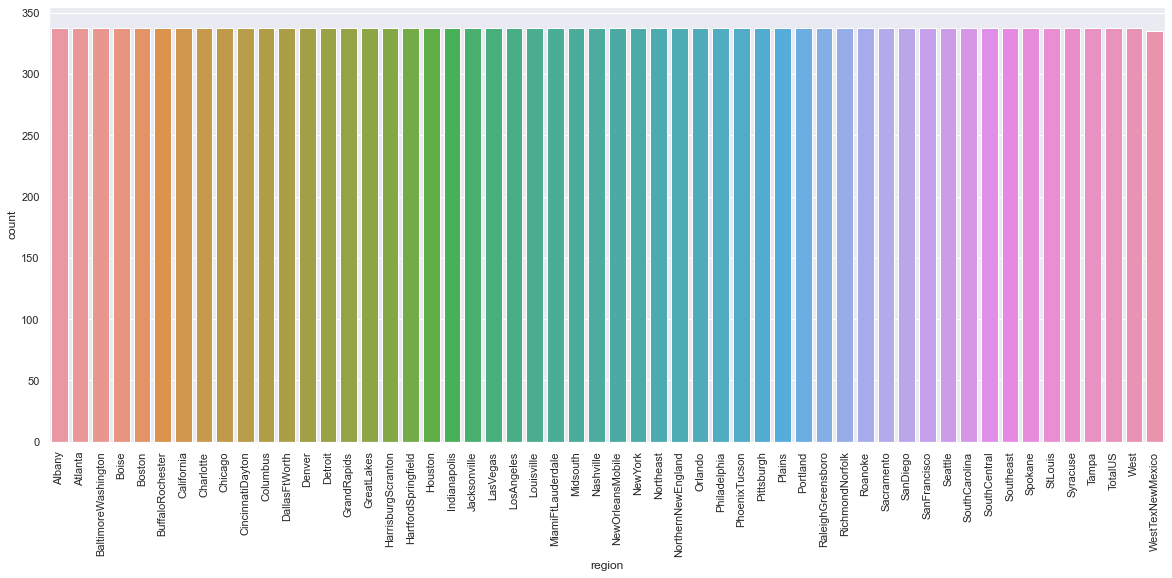

In [320]:
# Bar Chart to indicate the number of regions 
plt.figure(figsize=[20,8])
sns.countplot(x ='region', data = df)
plt.xticks(rotation = 90)
plt.show()

Almost all regions have equal number of sales

<AxesSubplot:xlabel='region'>

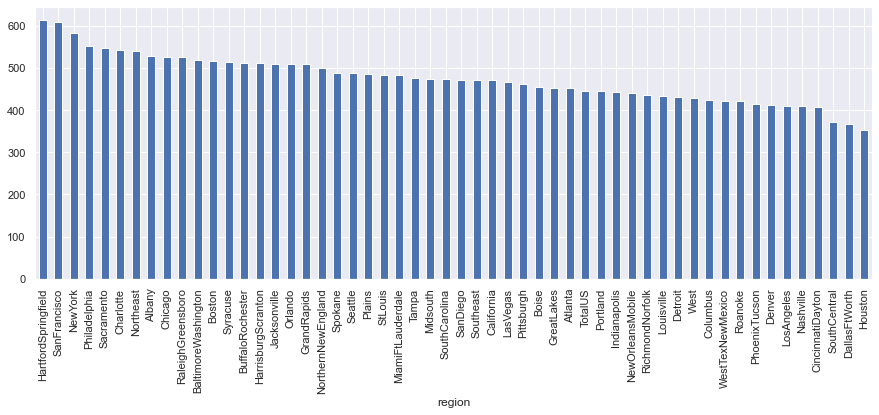

In [321]:
df.groupby("region")["AveragePrice"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))

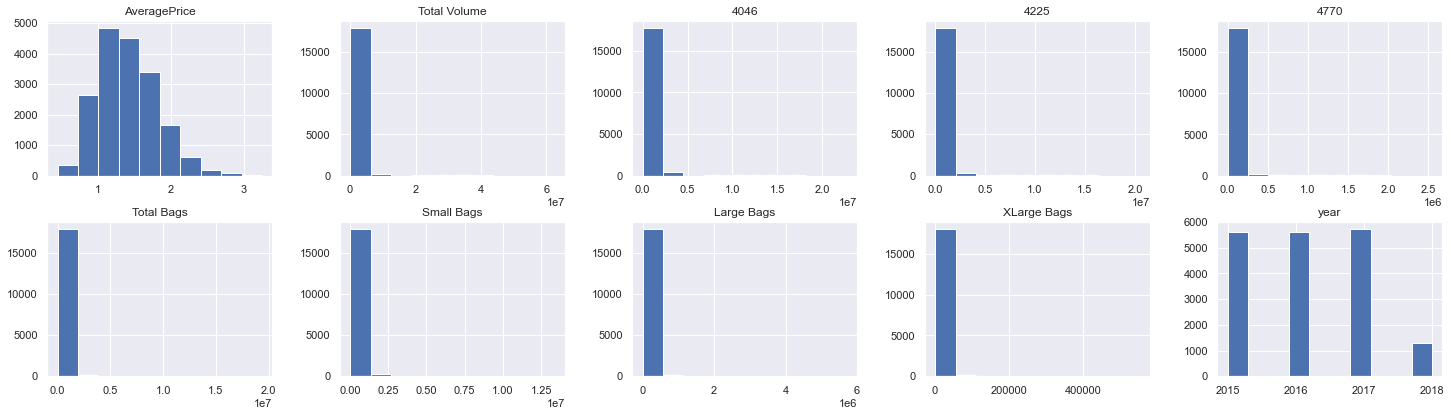

In [322]:
df.hist(figsize=(25,25), layout=(7,5), sharex=False);

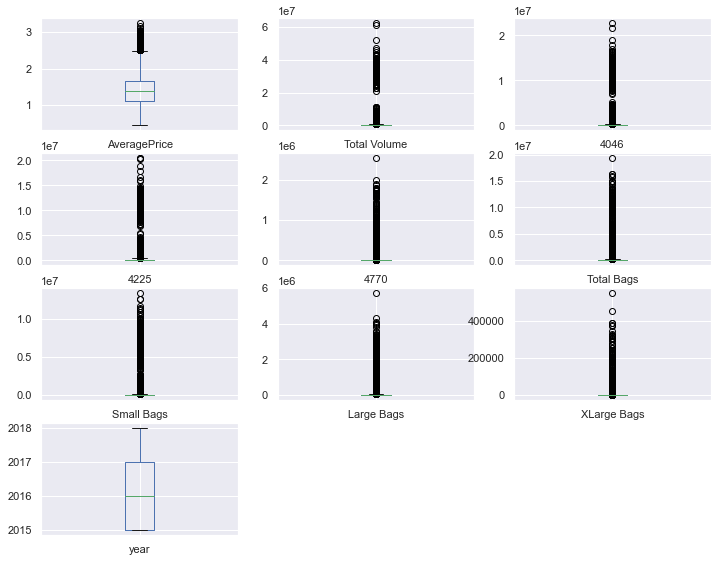

In [323]:
df.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,12))
plt.show()

Using box-plot, except year column, all the columns contains outliers and we need to remove them

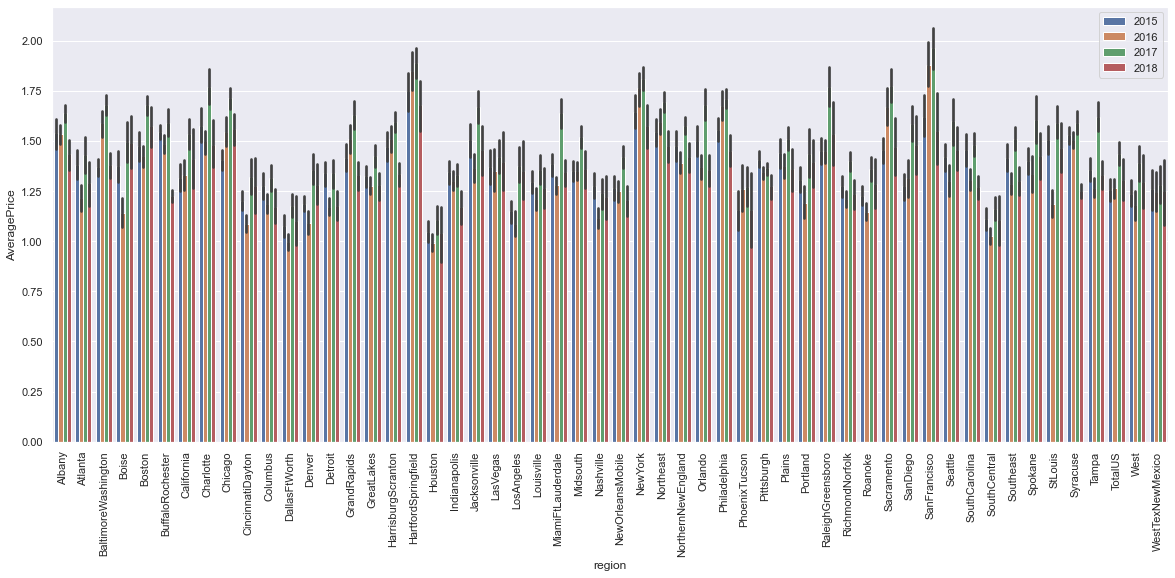

In [324]:
plt.figure(figsize=(20,8))
sns.barplot(x='region', y='AveragePrice', hue='year', data=df)
plt.legend(loc='upper right')
plt.xticks(rotation = 90)
plt.show()

From the above barplot,the region with highest AveragePrice is Sanfrancisco in 2017 and 2016,
the region with least AveragePrice is Houston in 2016 and SouthCentral in 2016.

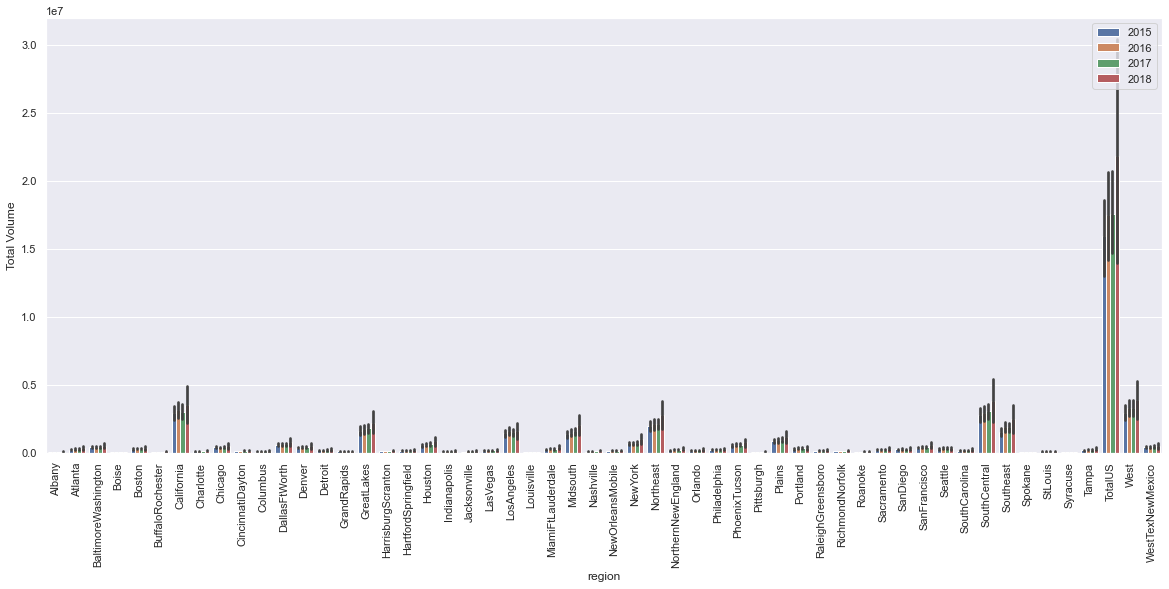

In [325]:
plt.figure(figsize=(20,8))
sns.barplot(x='region', y='Total Volume', hue='year', data=df)
plt.legend(loc='upper right')
plt.xticks(rotation = 90)
plt.show()

Total US has more volume of Avocadoes in the year 2018 and California has nearly equal quantity in 2015 and 2016.

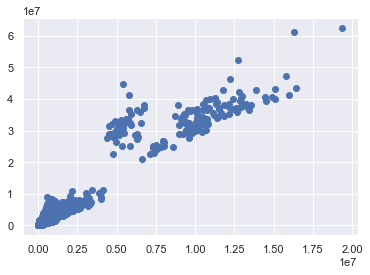

In [326]:
plt.scatter(df['Total Bags'],df['Total Volume'])
plt.show()

Total Bags and Total Volume are directly proportional to each other . i.e positive relation is there

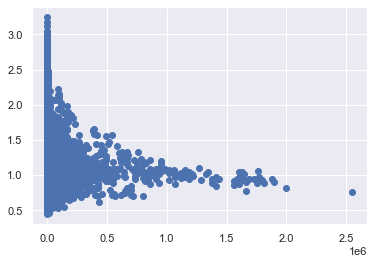

In [327]:
plt.scatter(df['4770'],df['AveragePrice'])

4770 and AveragePrice have kind of a inverse relation with each other 

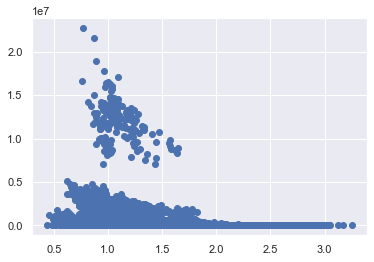

In [328]:
plt.scatter(df['AveragePrice'],df['4046'])

4046 and AveragePrice have kind of a inverse relation with each other and data is saturated at the initial part

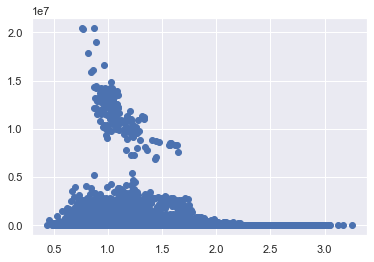

In [329]:
plt.scatter(df['AveragePrice'],df['4225'])

4225 and AveragePrice have kind of a linear relation with each other and data is saturated at the initial part

In [330]:
# convert the type of Date feature from object to datetime type
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [331]:
#converting date-time to ordinal
df['Date']=df['Date'].map(dt.datetime.toordinal)
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0  735959          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1  735952          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2  735945          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3  735938          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4  735931          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8603.62       93.25          0.0  conventional  2015  Albany  
1     9408.07       97.49          0.0  conventional  2015  Albany  
2     8042.21      103.14          0.0  conventional  2015  Albany  
3     5677.40      133.76          0.0  conventional  2015  Albany  
4     5986.26      197.69          0.0  conventional  2015  Albany

# Label-Encoding

In [332]:
# Applying label encoder to convert categorical columns into numerical columns

In [333]:
from sklearn.preprocessing import LabelEncoder
dfl= df.copy()
dfl= dfl.apply(LabelEncoder().fit_transform)
dfl.head()
df=dfl
df.head()

Date  AveragePrice  Total Volume  4046   4225  4770  Total Bags  \
0    51            86          7931  4383  10872  1400        5780   
1    50            88          7645  3616  10213  1570        6013   
2    49            46          9388  3891  12864  2516        5616   
3    48            61          8374  4545  11751  1789        4727   
4    47            81          7540  4201  10157  1836        4874   

   Small Bags  Large Bags  XLarge Bags  type  year  region  
0        5782        1264            0     0     0       0  
1        5972        1288            0     0     0       0  
2        5625        1328            0     0     0       0  
3        4880        1513            0     0     0       0  
4        4985        1855            0     0     0       0

All columns have converted to numbers

# To check the distribution of skewness

In [334]:
# Taking all columns and 30 rows for plotting and making variable collist to put columns values

In [335]:
collist=df.columns.values
ncol=13
nrow=30

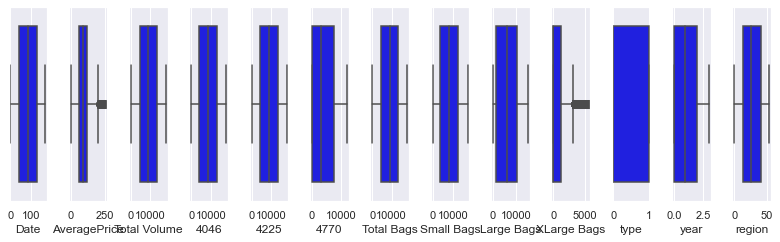

In [336]:
plt.figure(figsize=(11,100))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color='blue',orient='v')
    plt.tight_layout()

you can see that XLarge Bags contains outliers

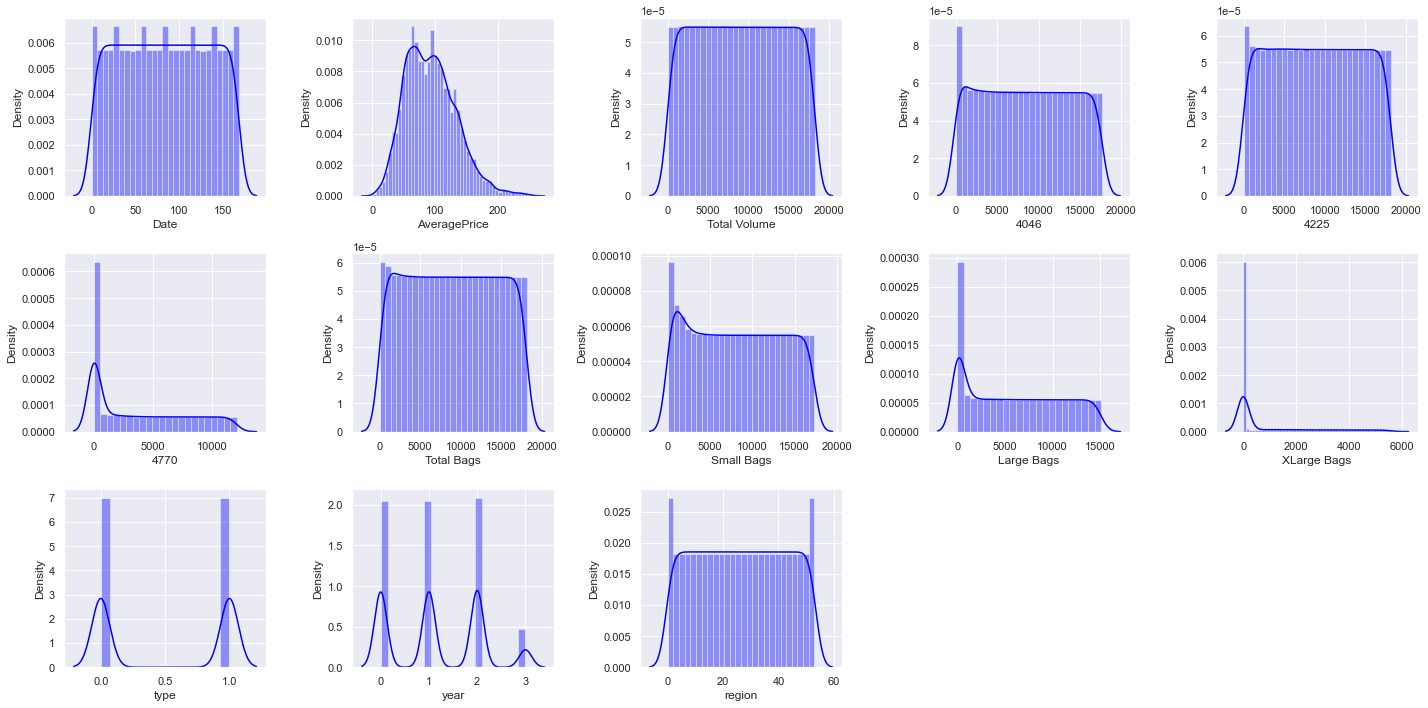

In [337]:
plt.figure(figsize=(20,10))
for i in range(0,len(collist)):
    plt.subplot(3,5,i+1)
    sns.distplot(df[collist[i]],color='blue')
    plt.tight_layout()

Xlarge bags,Smallbags,largebags,4770 contains some skewness

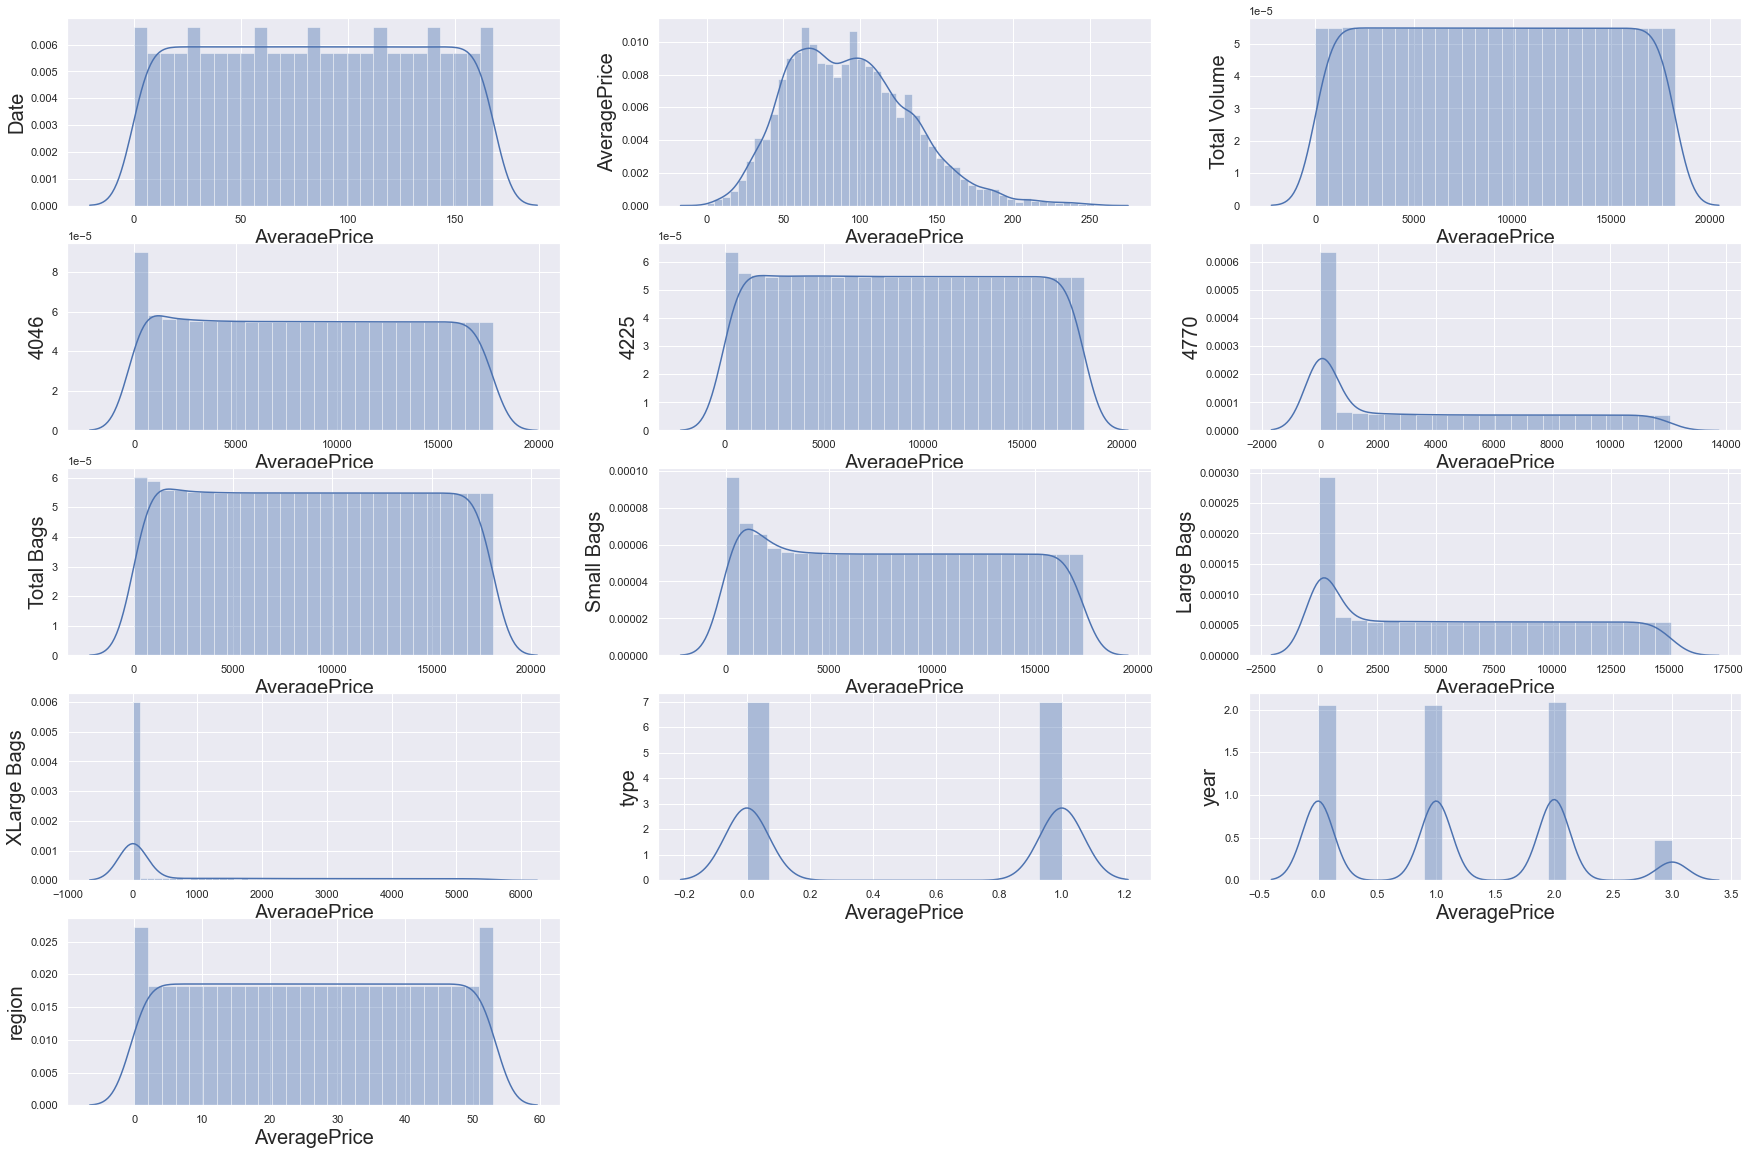

In [338]:
plt.figure(figsize=(30,20),facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=13:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.ylabel(column,fontsize=20)
        plt.xlabel('AveragePrice',fontsize=20)
    plotnumber+=1
plt.show()

In [339]:
df.skew()

Date            0.000117
AveragePrice    0.577300
Total Volume    0.000753
4046            0.016272
4225            0.003850
4770            0.510735
Total Bags      0.007023
Small Bags      0.048568
Large Bags      0.188522
XLarge Bags     1.610157
type            0.000329
year            0.215339
region          0.000030
dtype: float64

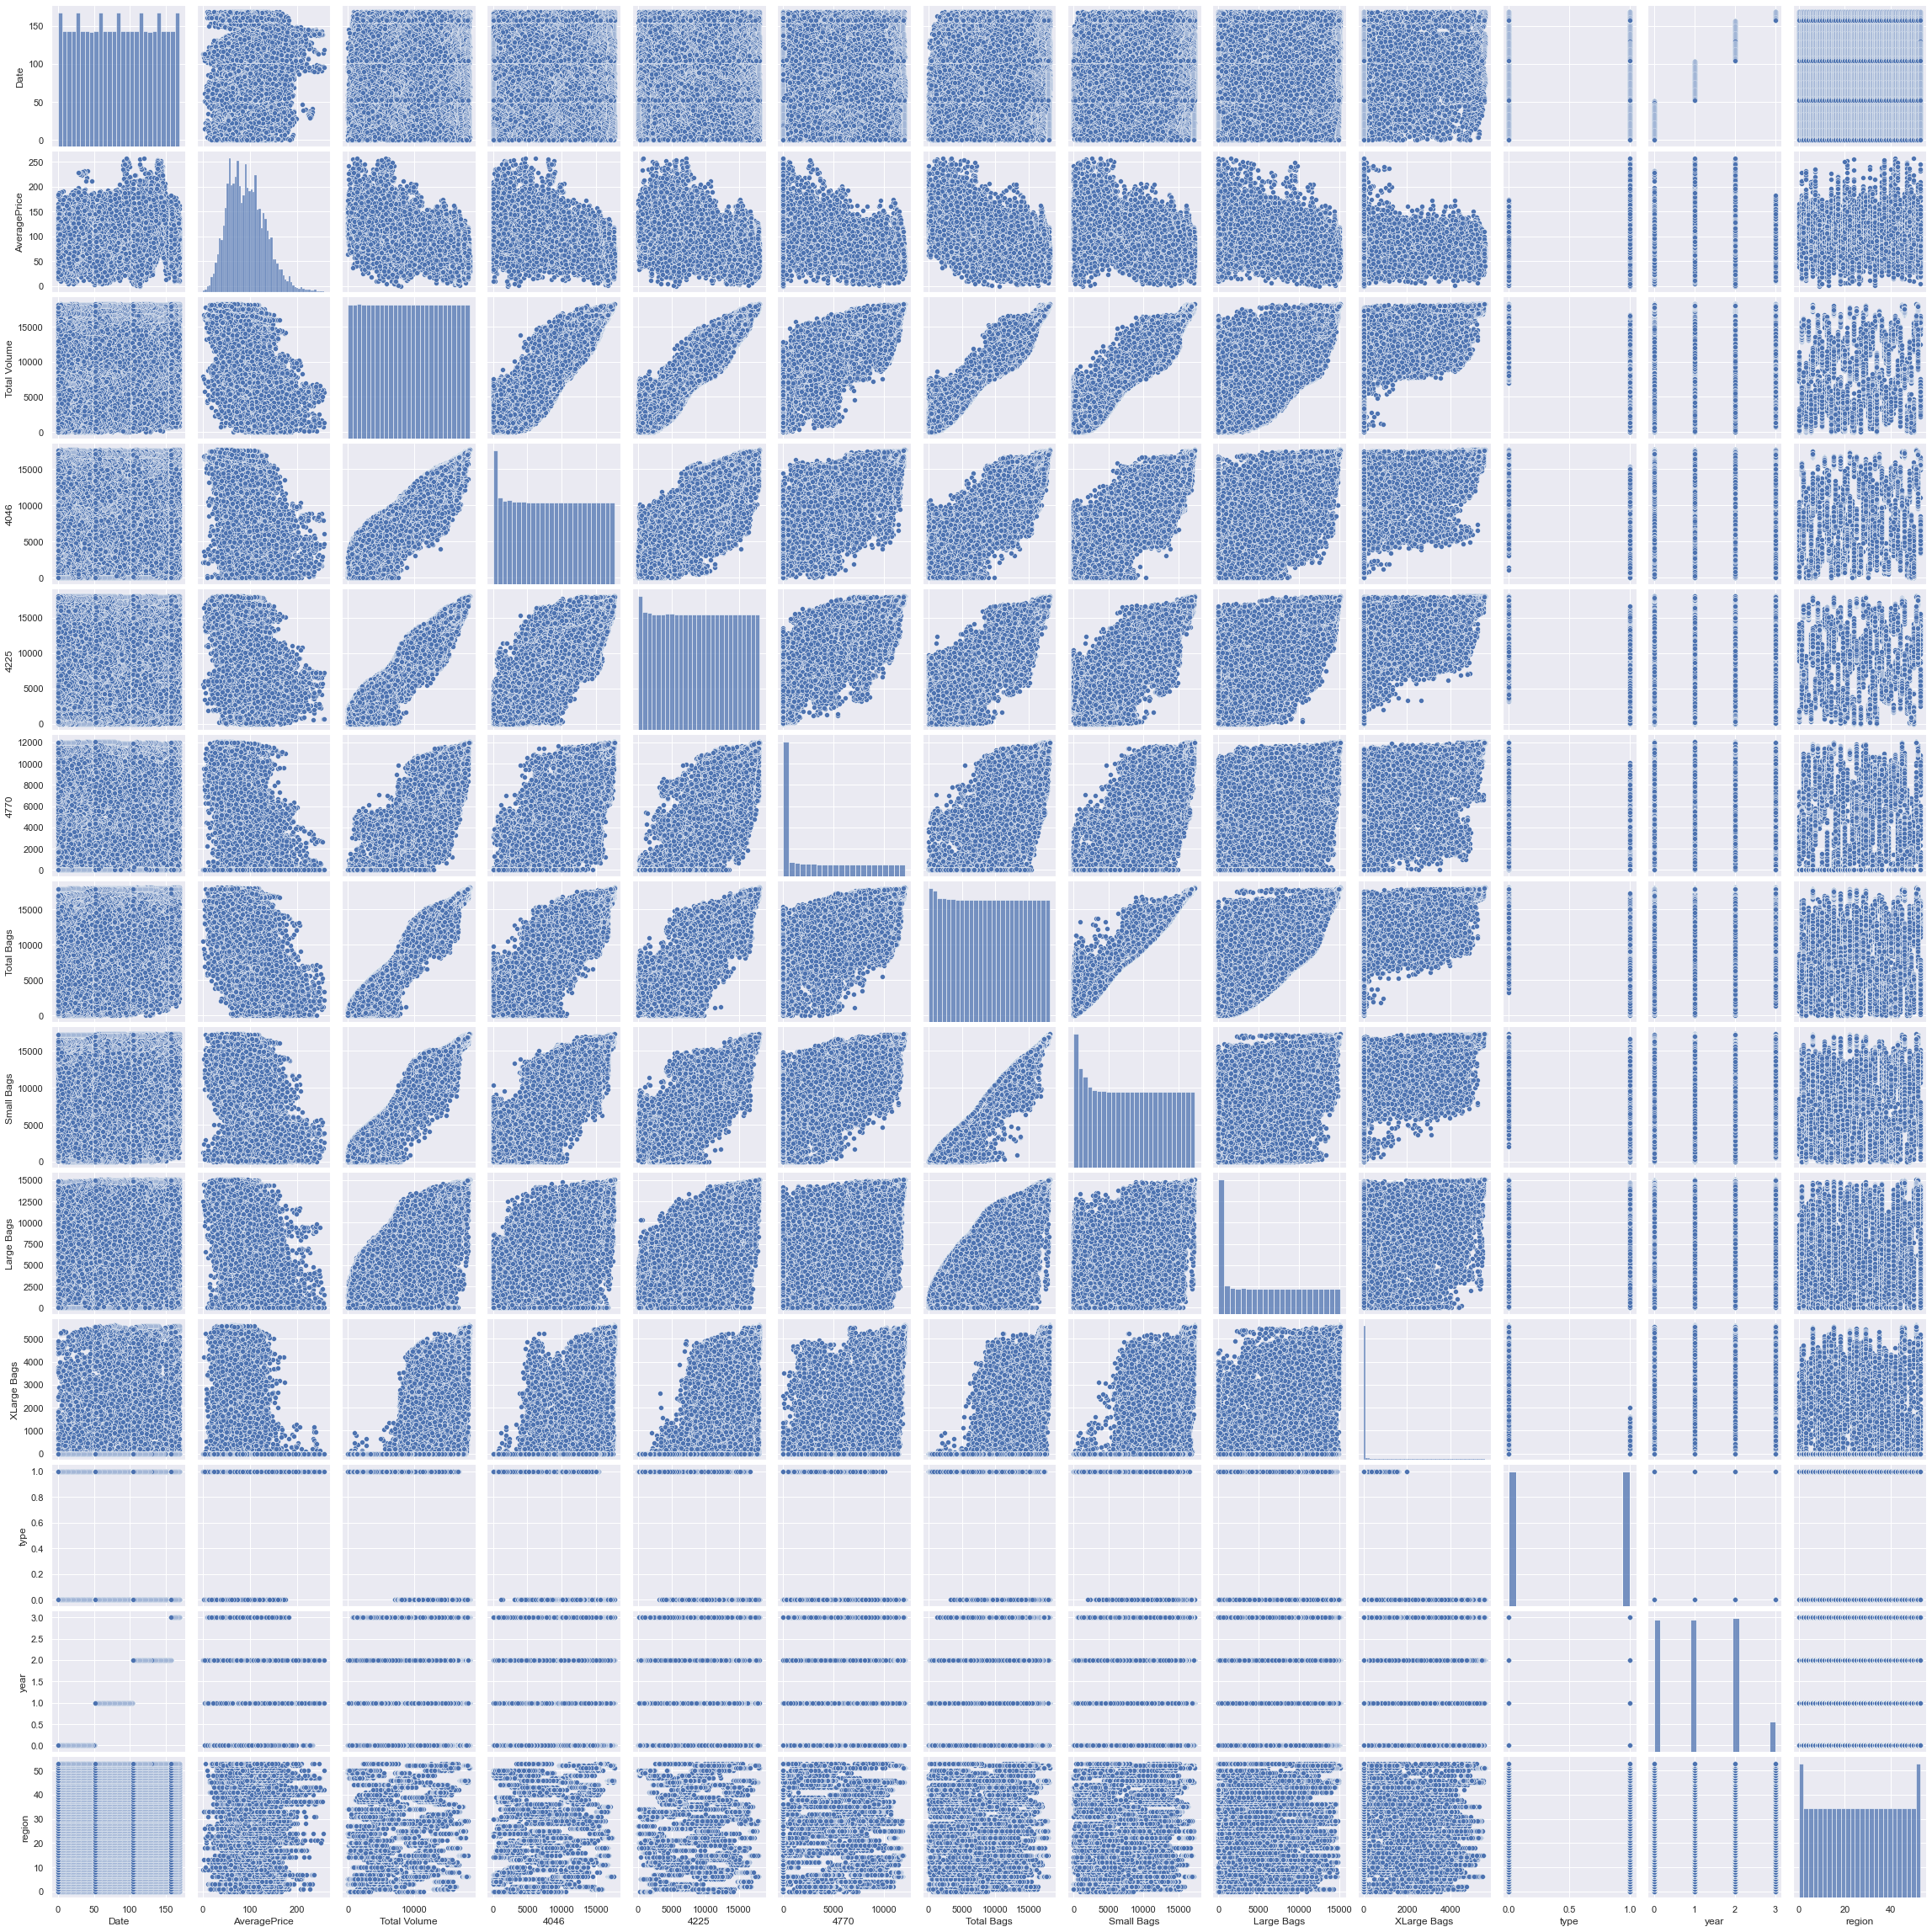

In [340]:
sns.pairplot(df)

# Removing Skewness 

In [341]:
#Treating skewness via log method
import numpy as np
for col in df.columns:
    if df[col].skew()> 1:
        df[col] = np.log1p(df[col])

In [342]:
df.skew()

Date            0.000117
AveragePrice    0.577300
Total Volume    0.000753
4046            0.016272
4225            0.003850
4770            0.510735
Total Bags      0.007023
Small Bags      0.048568
Large Bags      0.188522
XLarge Bags     0.758015
type            0.000329
year            0.215339
region          0.000030
dtype: float64

All the skewness have been removed except XLargeBags

Doing power transform method to remove skewness from XLarge Bags column

In [343]:
from sklearn.preprocessing import power_transform

In [344]:
df['XLarge Bags'] = power_transform(np.array(df['XLarge Bags']).reshape(-1,1),method='yeo-johnson')

In [345]:
df.skew()

Date            0.000117
AveragePrice    0.577300
Total Volume    0.000753
4046            0.016272
4225            0.003850
4770            0.510735
Total Bags      0.007023
Small Bags      0.048568
Large Bags      0.188522
XLarge Bags     0.681084
type            0.000329
year            0.215339
region          0.000030
dtype: float64

In [346]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No null values are there

# Removing Outliers using Z-Score

In [347]:
# Converting to absolute values
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.67635986, 0.18868869, 0.22480975, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       [0.69685742, 0.13900282, 0.27912775, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       [0.71735497, 1.18240612, 0.0519082 , ..., 0.99983562, 1.22128204,
        1.7002522 ],
       ...,
       [1.53737632, 1.15282984, 0.74291995, ..., 1.00016441, 1.97050371,
        1.70081131],
       [1.51687877, 1.30188745, 0.66448171, ..., 1.00016441, 1.97050371,
        1.70081131],
       [1.49638121, 0.53175644, 0.63162502, ..., 1.00016441, 1.97050371,
        1.70081131]])

In [348]:
# making threshold = 3
threshold=3
print(np.where(z>3))

(array([11320, 11321, 11323, 11324, 11325, 11326, 11327, 11328, 11329,
       11330, 11331, 11332, 12821, 12823, 13033, 13035, 13037, 13038,
       13395, 13657, 13661, 14019, 14020, 14073, 14074, 14119, 14120,
       14121, 14122, 14123, 14124, 14125, 14126, 14128, 14129, 14177,
       14385, 14699, 14701, 14702, 14807, 14911, 14912, 14913, 14914,
       14915, 14916, 14917, 14918, 14919, 15124, 15125, 15127, 15128,
       15129, 15130, 15510, 15511, 15667, 15668, 15671, 15673, 15674,
       15814, 15871, 16024, 16050, 16055, 16395, 16399, 16421, 16660,
       16661, 16662, 16663, 16664, 16665, 16666, 16667, 16714, 16715,
       16717, 16718, 16719, 16720, 16721, 16734, 16737, 16738, 16985,
       16986, 16994, 16995, 16996, 16997, 16998, 16999, 17000, 17007,
       17008, 17009, 17010, 17015, 17017, 17031, 17032, 17033, 17034,
       17035, 17036, 17037, 17038, 17039, 17040, 17047, 17244, 17245,
       17246, 17247, 17248, 17249, 17250, 17251, 17255, 17300, 17301,
       17302, 17303

Examples of array which contains outliers

In [349]:
z[11320][1]

3.4383799260606076

In [350]:
z[17428][1]

4.059453319671926

In [351]:
z[17304][1]

3.0657358898938165

In [352]:
# removing all outliers
df_new=df[(z<3).all(axis=1)]

In [353]:
df_new.shape

(18118, 13)

Now,removed all the outliers and df_new contains 18118 rows and 13 columns

we have lost around 131 rows and 0.7% of the data

In [354]:
# Now, Putting df_new values into df

In [355]:
df=df_new

In [356]:
df.shape

(18118, 13)

# Seperating target and independent variable

In [357]:
#Seperating into input and output variables
x=df.drop(('AveragePrice'), axis=1)
y=df['AveragePrice']

In [358]:
x

Date  Total Volume  4046   4225  4770  Total Bags  Small Bags  \
0        51          7931  4383  10872  1400        5780        5782   
1        50          7645  3616  10213  1570        6013        5972   
2        49          9388  3891  12864  2516        5616        5625   
3        48          8374  4545  11751  1789        4727        4880   
4        47          7540  4201  10157  1836        4874        4985   
...     ...           ...   ...    ...   ...         ...         ...   
18244   161          5729  5810   3188     0        6785        6648   
18245   160          5233  4653   4757     0        5955        5864   
18246   159          5203  4654   3928  4712        5985        5961   
18247   158          5616  5183   4402  4710        6360        6284   
18248   157          5789  6546   3853  3252        6541        6460   

       Large Bags  XLarge Bags  type  year  region  
0            1264    -0.716807     0     0       0  
1            1288    -0.716807     0     0       0  
2            1328    -0.716807     0     0       0  
3            1513    -0.716807     0     0       0  
4            1855    -0.716807     0     0       0  
...           ...          ...   ...   ...     ...  
18244        2676    -0.716807     1     3      53  
18245        2340    -0.716807     1     3      53  
18246         818    -0.716807     1     3      53  
18247         901    -0.716807     1     3      53  
18248         594    -0.716807     1     3      53  

[18118 rows x 12 columns]

In [359]:
y

0         86
1         88
2         46
3         61
4         81
        ... 
18244    116
18245    124
18246    140
18247    146
18248    115
Name: AveragePrice, Length: 18118, dtype: int64

# train_test_split

In [360]:
#Breaking our input and target variable into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=25)

In [361]:
sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from subprocess import check_output
from sklearn import metrics

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV


# Scaling the Data

In [362]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Model Selection

# Linear Regression

In [363]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [364]:
lm.score(x_train,y_train)

0.5613685410763487

In [365]:
lmpred=lm.predict(x_test)
lmpred

array([137.41466873,  58.48999567, 132.94265463, ...,  90.31235852,
        70.23609924,  66.65787777])

In [366]:
lm.score(x_test,y_test)

0.5588486687432397

In [367]:
lm.coef_

array([ 23.18543388, -33.359103  ,   3.72720254,  30.64277925,
        -2.23548493, -32.10033828,  27.56894373,  -1.15101552,
         0.47636761,  18.48194929, -14.12242927,   0.51036051])

In [368]:
print("MSE=",mean_squared_error(y_test,lmpred))

print("R2 score=",r2_score(y_test,lmpred))

MSE= 652.7557028546204
R2 score= 0.5588486687432397


Linear regression score is 55 percent

# Lasso-ridge

In [369]:
lasscv = LassoCV(alphas=None,cv=10,max_iter=10000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [370]:
alpha = lasscv.alpha_
alpha

0.00021336488015334594

In [371]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.00021336488015334594)

In [372]:
lasso_mod=lasso_reg.score(x_test,y_test)
lasso_mod*100

55.884930262686524

Lasso score is 56%

In [373]:
from sklearn.metrics import*
from sklearn.model_selection import*
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [374]:
from sklearn.model_selection  import cross_val_score

In [375]:
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,ElasticNet

# DTC,KNN,SVR ,ELASTIC NET

In [376]:
#Using algorithms via loop
model = [LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    m.fit(x_train,y_train)
    print('score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    
    print('Error:')
    
    print('Mean absolute error:', mean_absolute_error(y_test,predm))
    print('Mean squared error:', mean_squared_error(y_test, predm))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predm)))
    print('r2_score:',r2_score(y_test, predm))
    print('==============================================================================================')
    print('\n')

score of LinearRegression() is: 0.5613685410763487
Error:
Mean absolute error: 20.279725674081234
Mean squared error: 652.7557028546204
Root Mean Squared Error: 25.54908418817826
r2_score: 0.5588486687432397


score of DecisionTreeRegressor() is: 1.0
Error:
Mean absolute error: 13.204194260485652
Mean squared error: 398.1085356880059
Root Mean Squared Error: 19.952657359058865
r2_score: 0.7309466470604575


score of KNeighborsRegressor() is: 0.9196152709322363
Error:
Mean absolute error: 9.921854304635762
Mean squared error: 205.65988226637236
Root Mean Squared Error: 14.340846637014579
r2_score: 0.8610090567556096


score of SVR() is: 0.626514381207175
Error:
Mean absolute error: 18.35499826495429
Mean squared error: 566.5499401801286
Root Mean Squared Error: 23.80230955558995
r2_score: 0.617109035982538


score of Lasso() is: 0.4962820336952499
Error:
Mean absolute error: 21.550578232603602
Mean squared error: 744.3182971135673
Root Mean Squared Error: 27.28219743923805
r2_score: 0.4

# RandomForestRegressor

In [377]:
# Using Random Forest Regressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [378]:
y_rf_pred = reg_rf.predict(x_test)

In [379]:
reg_rf.score(x_train, y_train)

0.9856836170675204

In [380]:
reg_rf.score(x_test, y_test)

0.8877471011361597

RANDOM FOREST R2 SCORE = 88.5%

In [381]:
print('MAE:', metrics.mean_absolute_error(y_test, y_rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_rf_pred)))

MAE: 9.145283296541574
MSE: 166.09656302428257
RMSE: 12.887845554020368


In [382]:
metrics.r2_score(y_test, y_rf_pred)

0.8877471011361597

In [383]:
lnr = LinearRegression() 

result_lnr = pd.DataFrame({
    'Actual':y_test,
    'Predict':predm
})
result_lnr['Diff'] = y_test - predm
result_lnr.head()

Actual     Predict       Diff
17869     127  116.302839  10.697161
5125       47   66.865036 -19.865036
9868      122  118.562943   3.437057
2865       67   66.686078   0.313922
8742       55   69.404823 -14.404823

# Plotting scatter plot between test data and predicted data for Linear  Regressor

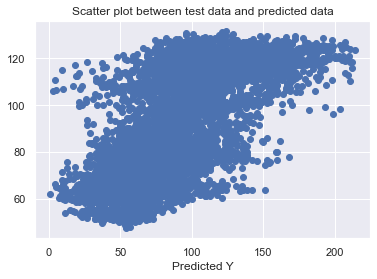

In [384]:
plt.scatter(y_test,predm)
plt.xlabel('y_test')
plt.xlabel('Predicted Y')
plt.title('Scatter plot between test data and predicted data')
plt.show()

In [385]:
print(cross_val_score(RandomForestRegressor(),x,y,cv=5).mean())

0.45095588125004193


# Hyperparameter Tuning using Randomized Search CV

In [386]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [387]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [388]:
from sklearn.metrics import*
from sklearn.model_selection import*

In [389]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [390]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  42.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  38.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  40.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  38.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  39.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time= 1.1min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  59.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [391]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [392]:
final_rf = RandomForestRegressor(n_estimators= 1000,
                                 min_samples_split= 2,
                                 min_samples_leaf= 1,
                                 max_features= 'sqrt',
                                 max_depth= 25)

In [393]:
final_rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)

In [394]:
final_rf.score(x_test,y_test)

0.885202794157207

# Conclusion

After doing hyperparameter tuning , we conclude that RandomforestRegressor is our best model with 88 % accuracy

# Saving the model

In [395]:
import joblib
joblib.dump(final_rf,"FinalModel.pkl")

['FinalModel.pkl']